<h1> Setup Environment </h1>
Necessary imports and environment variables.

In [1]:
import os
import torch
import random

import matplotlib.pyplot as plt
import torchvision.transforms as T

from IPython.display import HTML
from models import CNN, ViT
from trainers import SimCLRTrainer, DINOTrainer
from datasets import get_mnist_loaders, get_cifar10_loaders, get_imagenet_loaders, get_imagenette_loaders
from torch.utils.data import random_split, DataLoader, Subset
from tqdm.notebook import tqdm


os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = True

print(torch.cuda.is_available())  # Should print True
print(torch.cuda.get_device_name(0))  # Should print your GPU name

True
NVIDIA GeForce RTX 3070


<h1> Parameters for Model and Training </h1>
Parameters for model and training.

In [ ]:
# Model parameters
chw = (3, 192, 192)
n_patches = 12
hidden_d = 384
n_heads = 6
n_blocks = 12
n_classes = 1000

# Training parameters
n_epochs = 1
patience = 100
eval_every = 1
visualize_every = 100
num_workers = 4
batch_size = 116

<h1> Train Model</h1>
Model and trainer initialization, data loading, and training.

In [3]:
model = ViT(
    chw=chw, 
    n_patches=n_patches, 
    n_blocks=n_blocks, 
    hidden_d=hidden_d, 
    n_heads=n_heads, 
    num_classes=n_classes
).to('cuda')

trainer = DINOTrainer(model)

train_loader, test_loader = get_imagenet_loaders(batch_size=batch_size, num_workers=num_workers)

trainer.finetune(
    train_loader=train_loader,
    test_loader=test_loader,
    epochs=n_epochs,
    visualize_every=visualize_every,
    evaluate_every=eval_every,
    patience=patience,
    checkpoint_path='checkpoints/my_experiment',
    resume_from='checkpoints/my_experiment/latest_checkpoint.pt'
)

Loading checkpoint from checkpoints/my_experiment/latest_checkpoint.pt
Resuming from epoch 1 with best accuracy 41.11%


Epochs: 0it [00:00, ?it/s]

{'train_loss': [6.152226788903751,
  5.287828806613354,
  4.811262122102861,
  4.49061925194284,
  4.26808221112446,
  4.105436361855973,
  3.985788506023913,
  3.8864931280335564,
  3.802685889964624,
  3.736625055275982,
  3.6796588847409444,
  3.6309614594029105,
  3.588118896251245,
  3.557029697764454,
  3.5226744408734842,
  3.4932506450110834,
  3.4694228373268925,
  3.445873684298134,
  3.424719363847649,
  3.4064285279183757,
  3.390979140481565],
 'train_acc': [3.6846094225030774,
  11.183241529012221,
  17.259264405030727,
  22.005796277924738,
  25.580271736627623,
  28.355319798277662,
  30.44146469585932,
  32.267768370555906,
  33.77865649052778,
  35.015809804654666,
  36.08631817709947,
  37.07127954435292,
  37.823640477783144,
  38.45228607980068,
  39.12503209964041,
  39.62465470933922,
  40.12310651148523,
  40.598922700943746,
  41.05803536931563,
  41.446587369172015,
  41.655927759612915],
 'test_acc': [7.216,
  13.662,
  18.816,
  22.924,
  25.75,
  28.058,
  

<h1> Visualize Attention Map </h1>

In [4]:
# with open('data/imagenet/imagenet1000_clsidx_to_labels.txt', 'r') as f:
#     class_labels = eval(f.read())
# random_indices = random.sample(range(len(test_loader.dataset)), 1)

# for i in random_indices:
#     class_idx = test_loader.dataset[i][1]
#     class_name = class_labels[class_idx]
#     print(f"\nImage {i} class: {class_name} (index: {class_idx})")
    
#     for layer in range(n_blocks):
#         fig, axes = plt.subplots(1, min(n_heads, 4), figsize=(20, 5))
#         if n_heads == 1:
#             axes = [axes]
            
#         for head in range(min(n_heads, 4)):  # Show up to 4 heads
#             model.visualize_attention(
#                 images=test_loader.dataset[i][0].unsqueeze(0).to('cuda'),
#                 layer_idx=layer,
#                 head_idx=head,
#                 alpha=0.45,
#                 ax=axes[head]
#             )
        
#         plt.suptitle(f'Layer {layer} Attention Maps\nClass: {class_name}', size=16)
#         plt.tight_layout()
#         plt.show()

<h1> Visualize Class Separations </h1>

In [5]:
# anim = model.visualize_class_separation(
#     class_indices=[950, 5],
#     k=25,
#     perplexity=8,
#     dataloader=train_loader,
#     # save_path='class_separation.png'
# )

# HTML(anim.to_jshtml())

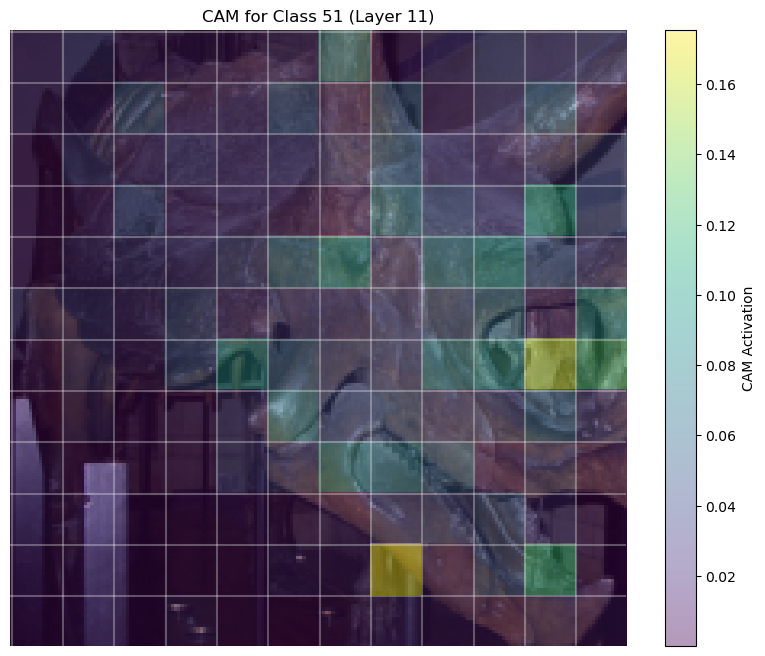

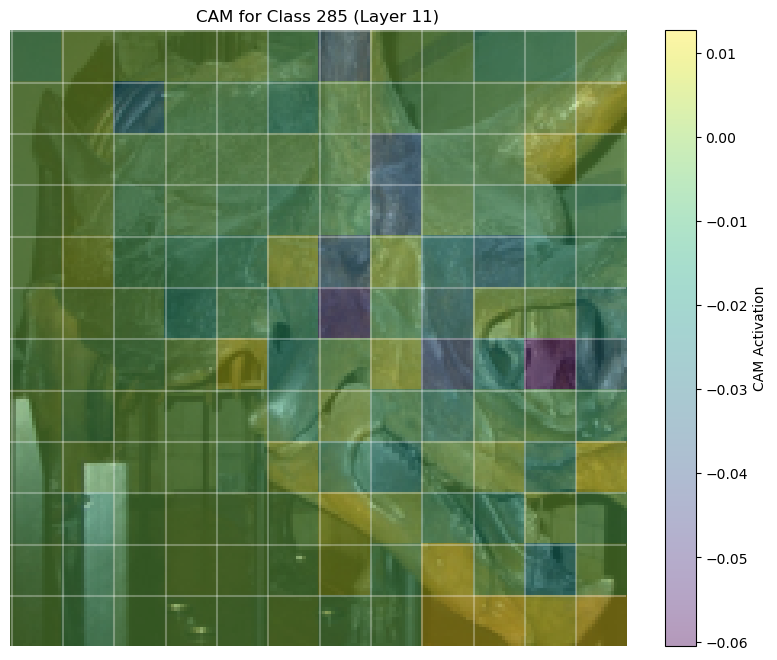

In [6]:
# Load an image
image_tensor = next(iter(train_loader))[0][0:1].to('cuda')

# Visualize CAM for predicted class
plt.figure(figsize=(10, 8))
model.visualize_cam(
    image_tensor,
    target_class=None,  # Use predicted class
    layer_idx=-1,       # Last layer
    head_idx=None,      # Average all heads
    alpha=0.4
)
plt.show()

# Visualize CAM for a specific class
plt.figure(figsize=(10, 8))
model.visualize_cam(
    image_tensor,
    target_class=285,   # Specific class (e.g., 285 = "Egyptian cat")
    layer_idx=-1,
    head_idx=None,
    alpha=0.4
)
plt.show()